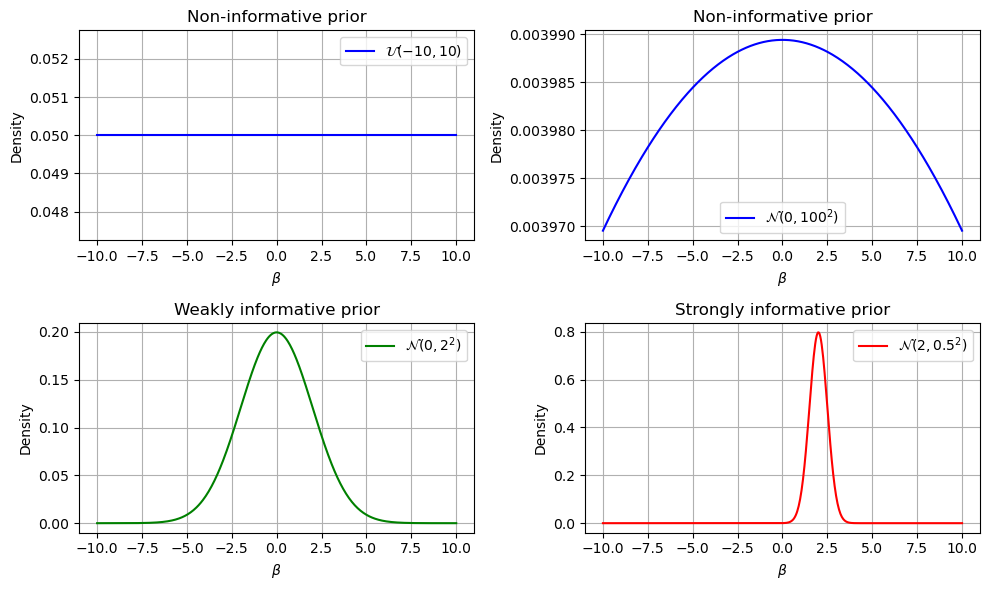

In [2]:
# === Slide 1 ===
# Title: Comparing Prior Distributions in Bayesian Inference

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Create a range of values for the parameter beta
x = np.linspace(-10, 10, 500)

# === Slide 2 ===
# Title: Define Prior Distributions

# Non-informative prior (Uniform distribution between -10 and 10)
non_informative = np.where((x >= -10) & (x <= 10), 1 / 20, 0)

# Alternative non-informative prior (Very wide Normal distribution)
non_informative_1 = norm.pdf(x, loc=0, scale=100)

# Weakly informative prior: Normal distribution with mean 0 and standard deviation 2
weakly_informative = norm.pdf(x, loc=0, scale=2)

# Strongly informative prior: Normal distribution with mean 2 and standard deviation 0.5
strongly_informative = norm.pdf(x, loc=2, scale=0.5)

# === Slide 3 ===
# Title: Visualize the Priors

# Create a 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)
axs = axs.flatten()  # Flatten the array to access plots by index

# Plot 1 (Top-left): Uniform non-informative prior
axs[0].plot(x, non_informative, label=r'$\mathcal{U}(-10, 10)$', color='blue')
axs[0].set_title('Non-informative prior')
axs[0].set_ylabel('Density')
axs[0].set_xlabel(r'$\beta$')
axs[0].legend()
axs[0].grid(True)

# Plot 2 (Top-right): Normal non-informative prior (wide)
axs[1].plot(x, non_informative_1, label=r'$\mathcal{N}(0, 100^2)$', color='blue')
axs[1].set_title('Non-informative prior')
axs[1].set_ylabel('Density')
axs[1].set_xlabel(r'$\beta$')
axs[1].legend()
axs[1].grid(True)

# Plot 3 (Bottom-left): Weakly informative prior
axs[2].plot(x, weakly_informative, label=r'$\mathcal{N}(0, 2^2)$', color='green')
axs[2].set_title('Weakly informative prior')
axs[2].set_ylabel('Density')
axs[2].set_xlabel(r'$\beta$')
axs[2].legend()
axs[2].grid(True)

# Plot 4 (Bottom-right): Strongly informative prior
axs[3].plot(x, strongly_informative, label=r'$\mathcal{N}(2, 0.5^2)$', color='red')
axs[3].set_title('Strongly informative prior')
axs[3].set_ylabel('Density')
axs[3].set_xlabel(r'$\beta$')
axs[3].legend()
axs[3].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


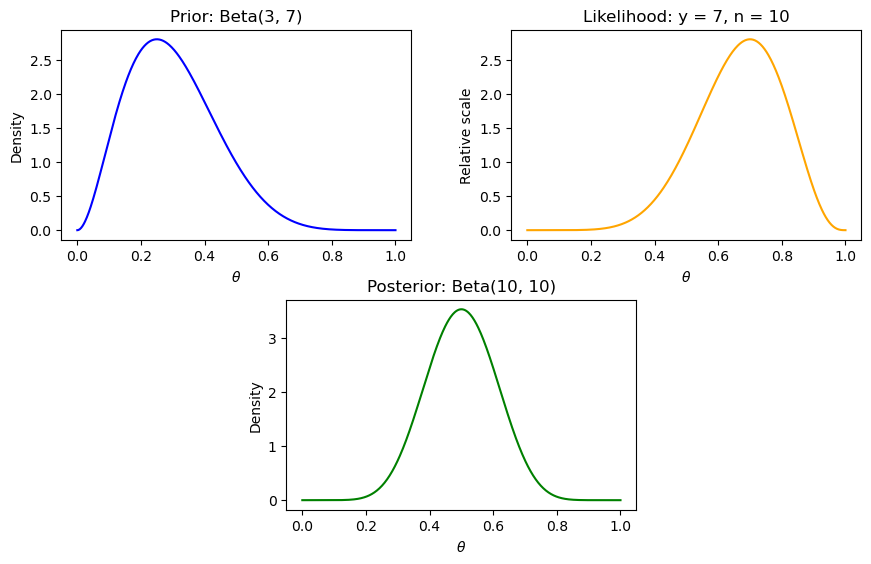

In [4]:
# === Slide 1 ===
# Title: Bayesian Updating in the Beta-Binomial Model

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

# === Slide 2 ===
# Title: Define Prior, Data, and Posterior Parameters

# Prior parameters (Beta distribution)
alpha_prior = 3
beta_prior = 7

# Observed data: number of trials and number of successes
n = 10     # Total trials
y = 7      # Successes observed

# Posterior parameters: Beta(alpha + y, beta + n - y)
alpha_post = alpha_prior + y     # 3 + 7 = 10
beta_post = beta_prior + n - y   # 7 + (10 - 7) = 10

# Create a grid of theta values between 0 and 1
theta = np.linspace(0, 1, 500)

# === Slide 3 ===
# Title: Compute Prior, Likelihood, and Posterior

# Prior density: Beta(alpha_prior, beta_prior)
prior_density = beta.pdf(theta, alpha_prior, beta_prior)

# Likelihood: Binomial probability mass function
likelihood = binom.pmf(y, n, theta)

# Rescale likelihood to match prior scale for comparison
likelihood_scaled = likelihood / max(likelihood) * max(prior_density)

# Posterior density: Beta(alpha_post, beta_post)
posterior_density = beta.pdf(theta, alpha_post, beta_post)

# === Slide 4 ===
# Title: Visualizing the Bayesian Update (Pyramid Layout)

# Create a custom layout with 3 subplots (prior, likelihood, posterior)
fig = plt.figure(figsize=(10, 6))

# Top left: Prior
ax1 = fig.add_axes([0.1, 0.55, 0.35, 0.35])  # [left, bottom, width, height]
ax1.plot(theta, prior_density, color='blue')
ax1.set_title("Prior: Beta(3, 7)")
ax1.set_xlabel(r"$\theta$")
ax1.set_ylabel("Density")

# Top right: Likelihood
ax2 = fig.add_axes([0.55, 0.55, 0.35, 0.35])
ax2.plot(theta, likelihood_scaled, color='orange')
ax2.set_title("Likelihood: y = 7, n = 10")
ax2.set_xlabel(r"$\theta$")
ax2.set_ylabel("Relative scale")

# Bottom center: Posterior
ax3 = fig.add_axes([0.325, 0.1, 0.35, 0.35])
ax3.plot(theta, posterior_density, color='green')
ax3.set_title("Posterior: Beta(10, 10)")
ax3.set_xlabel(r"$\theta$")
ax3.set_ylabel("Density")

# Show the full plot
plt.show()



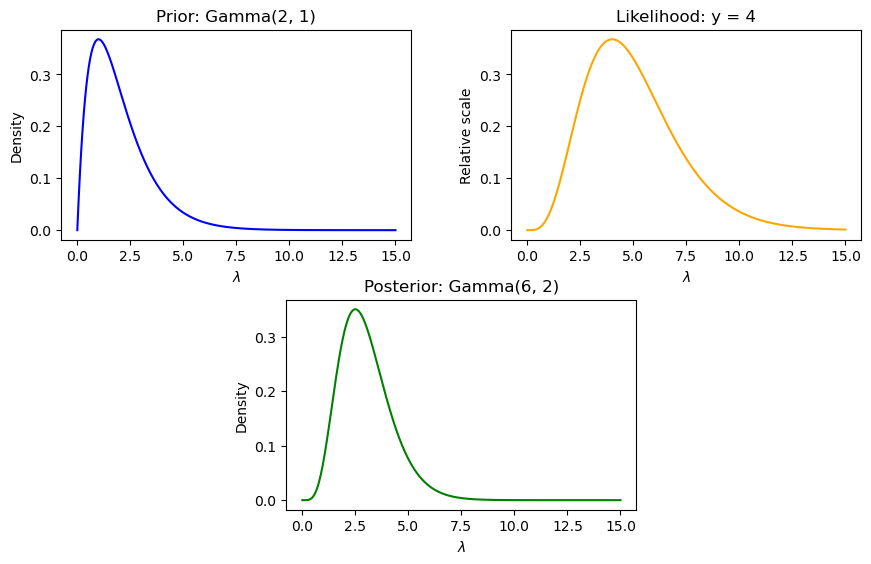

In [5]:
# === Slide 1 ===
# Title: Bayesian Updating in the Gamma-Poisson Model

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

# === Slide 2 ===
# Title: Define Prior, Data, and Posterior Parameters

# Prior parameters for the Gamma distribution
alpha_prior = 2
beta_prior = 1

# Observed data
y = 4      # Number of events observed
n = 1      # Number of observations (Poisson is per unit time or space)

# Posterior parameters for Gamma(alpha + y, beta + n)
alpha_post = alpha_prior + y     # 2 + 4 = 6
beta_post = beta_prior + n       # 1 + 1 = 2

# Create a grid of lambda values
lmbda = np.linspace(0, 15, 500)

# === Slide 3 ===
# Title: Compute Prior, Likelihood, and Posterior

# Prior density: Gamma(alpha_prior, beta_prior)
prior_density = gamma.pdf(lmbda, a=alpha_prior, scale=1/beta_prior)

# Likelihood: Poisson probability mass function scaled for plotting
likelihood = poisson.pmf(y, lmbda)
likelihood_scaled = likelihood / max(likelihood) * max(prior_density)

# Posterior density: Gamma(alpha_post, beta_post)
posterior_density = gamma.pdf(lmbda, a=alpha_post, scale=1/beta_post)

# === Slide 4 ===
# Title: Visualizing the Gamma-Poisson Update

# Create a custom triangular layout for plots
fig = plt.figure(figsize=(10, 6))

# Top left: Prior
ax1 = fig.add_axes([0.1, 0.55, 0.35, 0.35])  # [left, bottom, width, height]
ax1.plot(lmbda, prior_density, color='blue')
ax1.set_title("Prior: Gamma(2, 1)")
ax1.set_xlabel(r"$\lambda$")
ax1.set_ylabel("Density")

# Top right: Likelihood (scaled for visual comparison)
ax2 = fig.add_axes([0.55, 0.55, 0.35, 0.35])
ax2.plot(lmbda, likelihood_scaled, color='orange')
ax2.set_title("Likelihood: y = 4")
ax2.set_xlabel(r"$\lambda$")
ax2.set_ylabel("Relative scale")

# Bottom center: Posterior
ax3 = fig.add_axes([0.325, 0.1, 0.35, 0.35])
ax3.plot(lmbda, posterior_density, color='green')
ax3.set_title("Posterior: Gamma(6, 2)")
ax3.set_xlabel(r"$\lambda$")
ax3.set_ylabel("Density")

# Show the plot
plt.show()



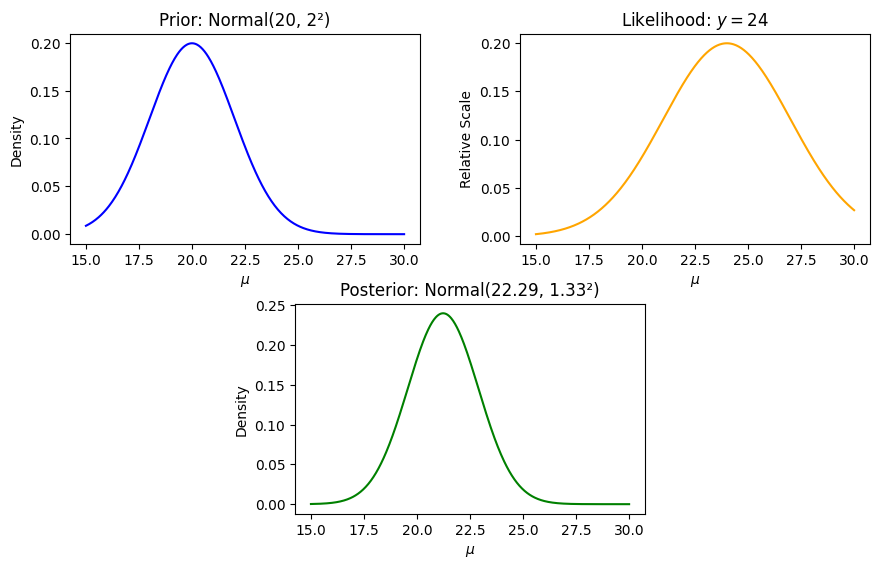

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Parameters ---
mu_prior = 20       # Prior mean
tau2_prior = 4      # Prior variance
sigma2_known = 9    # Known variance of the data
n = 1               # Number of observations
y_obs = 24          # Observed value

# --- Posterior Calculation ---
# Posterior mean and variance (conjugate Normal model)
posterior_variance = 1 / (1/tau2_prior + n/sigma2_known)
posterior_mean = posterior_variance * (mu_prior/tau2_prior + n*y_obs/sigma2_known)

# --- Grids for plotting ---
mu_grid = np.linspace(15, 30, 500)

# Prior: N(mu_prior, tau2_prior)
prior_density = norm.pdf(mu_grid, loc=mu_prior, scale=np.sqrt(tau2_prior))

# Likelihood: scaled for visualization (not a density in mu)
likelihood = norm.pdf(y_obs, loc=mu_grid, scale=np.sqrt(sigma2_known))
likelihood_scaled = likelihood / np.max(likelihood) * np.max(prior_density)

# Posterior: N(posterior_mean, posterior_variance)
posterior_density = norm.pdf(mu_grid, loc=posterior_mean, scale=np.sqrt(posterior_variance))

# --- Plotting ---
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_axes([0.1, 0.55, 0.35, 0.35])     # Prior
ax2 = fig.add_axes([0.55, 0.55, 0.35, 0.35])    # Likelihood
ax3 = fig.add_axes([0.325, 0.1, 0.35, 0.35])    # Posterior

# Plot Prior
ax1.plot(mu_grid, prior_density, color='blue')
ax1.set_title("Prior: Normal(20, 2²)")
ax1.set_xlabel(r"$\mu$")
ax1.set_ylabel("Density")

# Plot Likelihood (scaled)
ax2.plot(mu_grid, likelihood_scaled, color='orange')
ax2.set_title("Likelihood: $y = 24$")
ax2.set_xlabel(r"$\mu$")
ax2.set_ylabel("Relative Scale")

# Plot Posterior
ax3.plot(mu_grid, posterior_density, color='green')
ax3.set_title("Posterior: Normal(22.29, 1.33²)")
ax3.set_xlabel(r"$\mu$")
ax3.set_ylabel("Density")

plt.show()


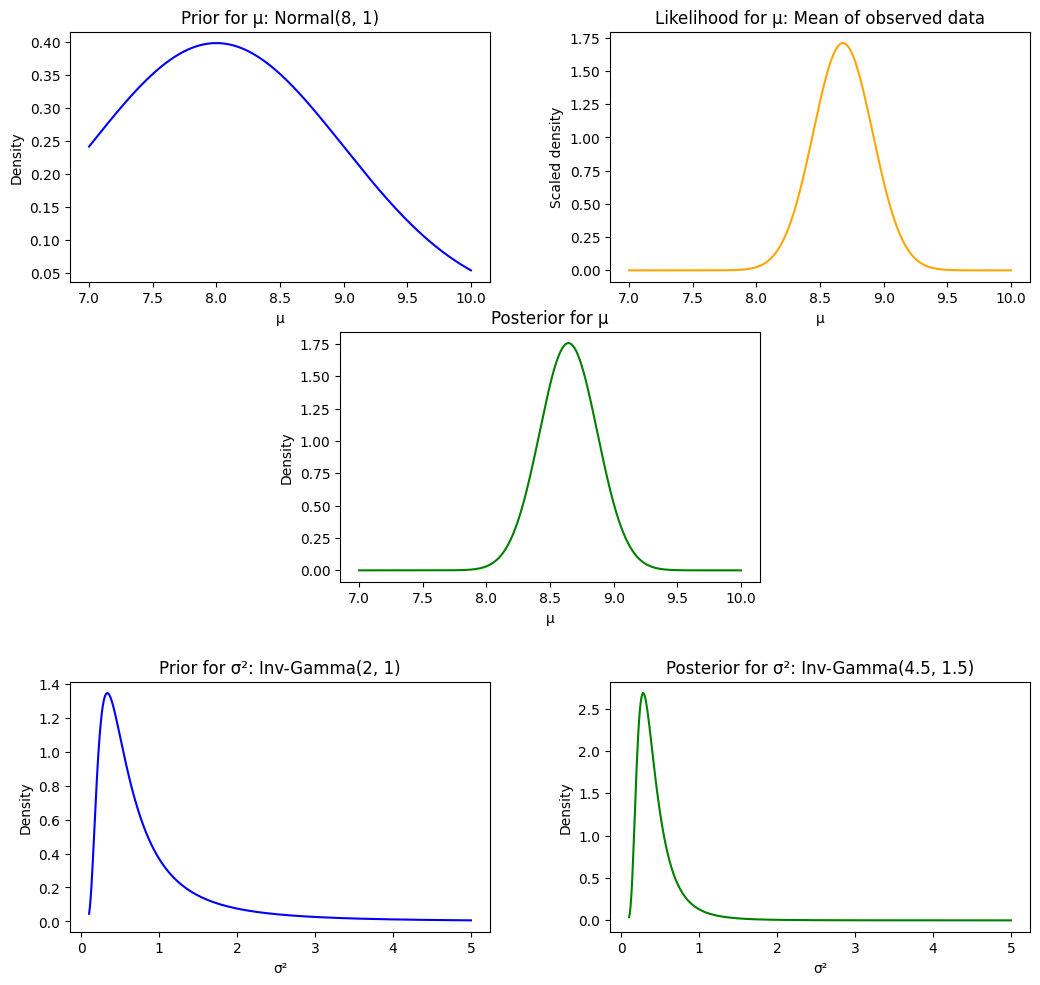

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

# --- Simulated data ---
np.random.seed(123)
y = np.array([8.5, 9.2, 7.9, 8.7, 9.1])
n = len(y)
y_bar = np.mean(y)
s2 = np.var(y, ddof=1)

# --- Priors ---
mu0 = 8.0          # Prior mean for mu
tau2 = 1.0         # Prior variance for mu
alpha0 = 2.0       # Shape for Inv-Gamma prior on sigma^2
beta0 = 1.0        # Scale for Inv-Gamma prior on sigma^2

# --- Posterior parameters ---
mu_n = (tau2 * n * y_bar + s2 * mu0) / (n * tau2 + s2)
tau2_n = (s2 * tau2) / (n * tau2 + s2)
alpha_n = alpha0 + n / 2
beta_n = beta0 + 0.5 * np.sum((y - y_bar) ** 2)

# --- Grids for plotting ---
mu_grid = np.linspace(7, 10, 500)
sigma2_grid = np.linspace(0.1, 5, 500)

# --- Densities ---
prior_mu = norm.pdf(mu_grid, loc=mu0, scale=np.sqrt(tau2))
likelihood_mu = norm.pdf(mu_grid, loc=y_bar, scale=np.sqrt(s2/n))
posterior_mu = norm.pdf(mu_grid, loc=mu_n, scale=np.sqrt(tau2_n))

prior_sigma2 = invgamma.pdf(sigma2_grid, a=alpha0, scale=beta0)
posterior_sigma2 = invgamma.pdf(sigma2_grid, a=alpha_n, scale=beta_n)

# --- Plotting ---
fig = plt.figure(figsize=(12, 10))

# Prior for mu
ax1 = fig.add_axes([0.1, 0.7, 0.35, 0.25])
ax1.plot(mu_grid, prior_mu, label='Prior', color='blue')
ax1.set_title("Prior for μ: Normal(8, 1)")
ax1.set_xlabel("μ")
ax1.set_ylabel("Density")

# Likelihood for mu
ax2 = fig.add_axes([0.55, 0.7, 0.35, 0.25])
ax2.plot(mu_grid, likelihood_mu, label='Likelihood', color='orange')
ax2.set_title("Likelihood for μ: Mean of observed data")
ax2.set_xlabel("μ")
ax2.set_ylabel("Scaled density")

# Posterior for mu
ax3 = fig.add_axes([0.325, 0.4, 0.35, 0.25])
ax3.plot(mu_grid, posterior_mu, label='Posterior', color='green')
ax3.set_title("Posterior for μ")
ax3.set_xlabel("μ")
ax3.set_ylabel("Density")

# Prior for sigma^2
ax4 = fig.add_axes([0.1, 0.05, 0.35, 0.25])
ax4.plot(sigma2_grid, prior_sigma2, label='Prior', color='blue')
ax4.set_title("Prior for σ²: Inv-Gamma(2, 1)")
ax4.set_xlabel("σ²")
ax4.set_ylabel("Density")

# Posterior for sigma^2
ax5 = fig.add_axes([0.55, 0.05, 0.35, 0.25])
ax5.plot(sigma2_grid, posterior_sigma2, label='Posterior', color='green')
ax5.set_title(f"Posterior for σ²: Inv-Gamma({alpha_n:.1f}, {beta_n:.1f})")
ax5.set_xlabel("σ²")
ax5.set_ylabel("Density")

plt.show()


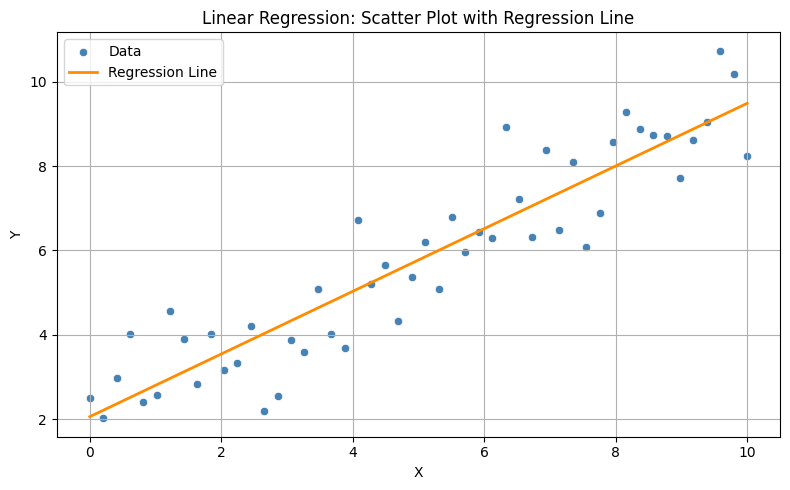

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 50)
true_beta0 = 2
true_beta1 = 0.8
noise = np.random.normal(0, 1, size=X.shape)
Y = true_beta0 + true_beta1 * X + noise

# Perform linear regression using numpy
X_matrix = np.vstack([np.ones_like(X), X]).T
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
line = beta_hat[0] + beta_hat[1] * X

# Plot the scatter and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=Y, color='steelblue', label='Data')
plt.plot(X, line, color='darkorange', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression: Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 3_000 tune and 10_000 draw iterations (12_000 + 40_000 draws total) took 6 seconds.


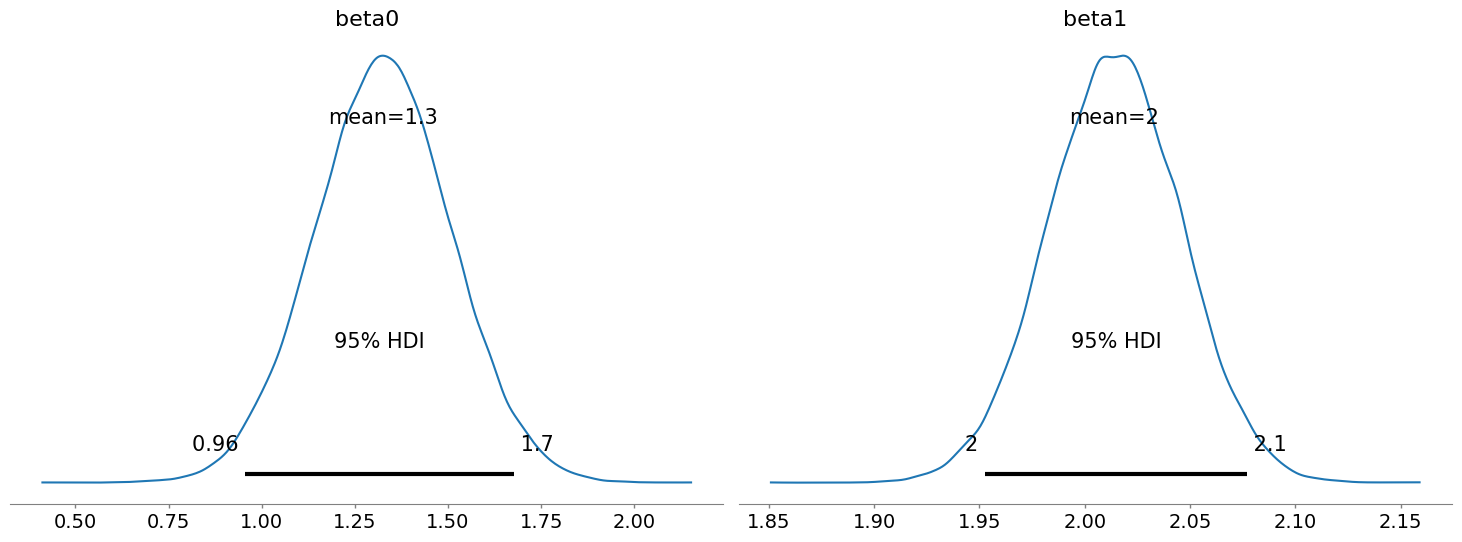

In [25]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

# Datos simulados
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_beta0 = 1.5
true_beta1 = 2.0
sigma = 1.0
y = true_beta0 + true_beta1 * x + np.random.normal(0, sigma, size=n)

# Modelo bayesiano en PyMC
with pm.Model() as linear_model:
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=5)
    
    mu = beta0 + beta1 * x
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    trace = pm.sample(10000, tune=3000, target_accept=0.9, return_inferencedata=True)

# Graficar las densidades posteriores
az.plot_posterior(trace, var_names=["beta0", "beta1"], hdi_prob=0.95)
plt.tight_layout()
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


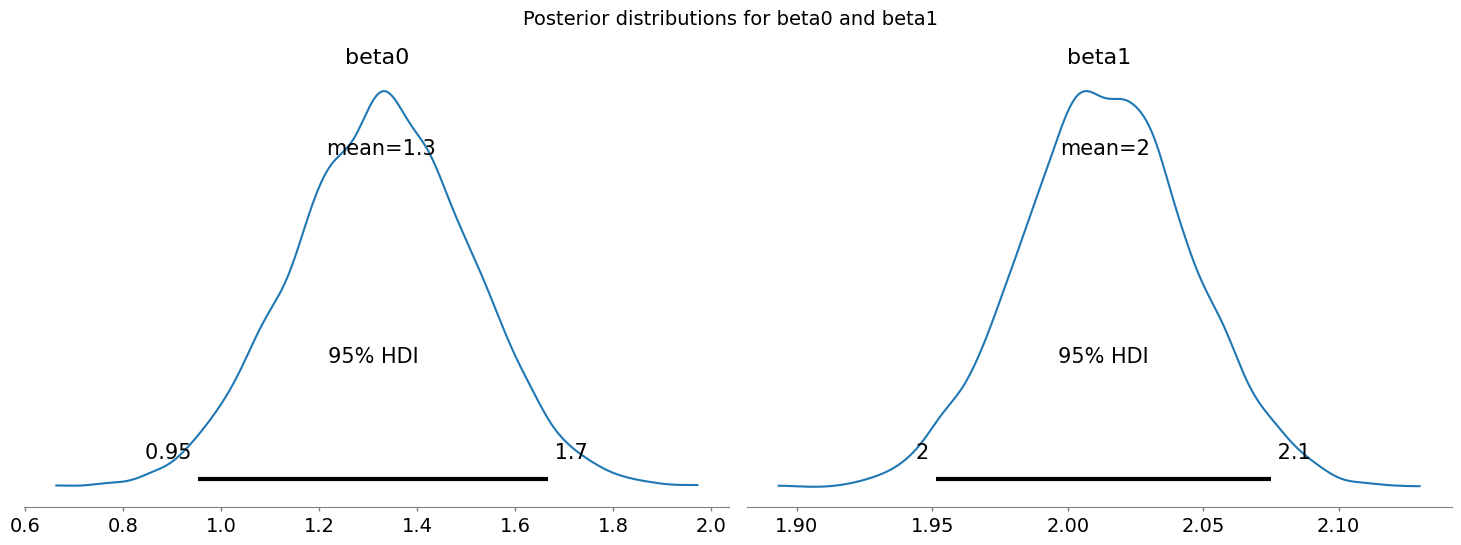

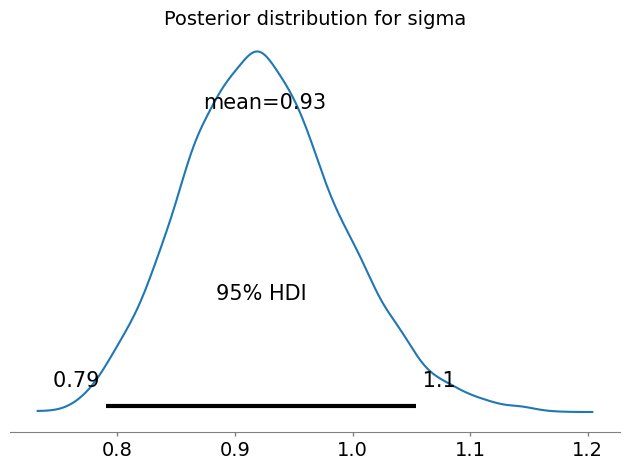

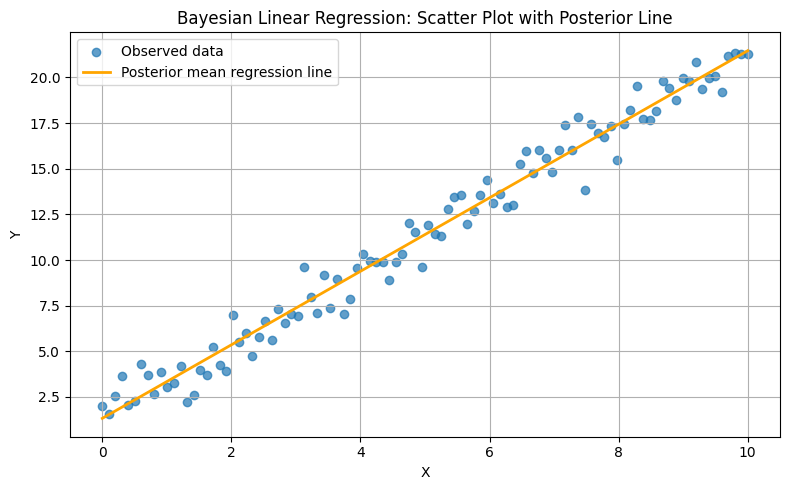

In [14]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated data
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_beta0 = 1.5
true_beta1 = 2.0
true_sigma = 1.0
y = true_beta0 + true_beta1 * x + np.random.normal(0, true_sigma, size=n)

# Bayesian linear regression model
with pm.Model() as linear_model:
    # Priors for regression coefficients
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    
    # Prior for error standard deviation
    sigma = pm.HalfNormal("sigma", sigma=5)
    
    # Likelihood
    mu = beta0 + beta1 * x
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
    
    # MCMC sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Plot posterior for beta0 and beta1
az.plot_posterior(trace, var_names=["beta0", "beta1"], hdi_prob=0.95)
plt.suptitle("Posterior distributions for beta0 and beta1", fontsize=14)
plt.tight_layout()
plt.show()

# Plot posterior for sigma
az.plot_posterior(trace, var_names=["sigma"], hdi_prob=0.95)
plt.title("Posterior distribution for sigma", fontsize=14)
plt.tight_layout()
plt.show()

# Extract posterior means for regression line
beta0_mean = trace.posterior["beta0"].mean().values
beta1_mean = trace.posterior["beta1"].mean().values

# Plot data and regression line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Observed data", alpha=0.7)
plt.plot(x, beta0_mean + beta1_mean * x, color="orange", linewidth=2, label="Posterior mean regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesian Linear Regression: Scatter Plot with Posterior Line")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


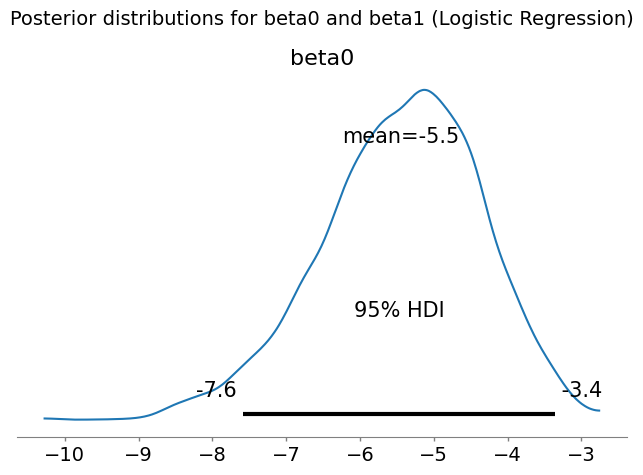

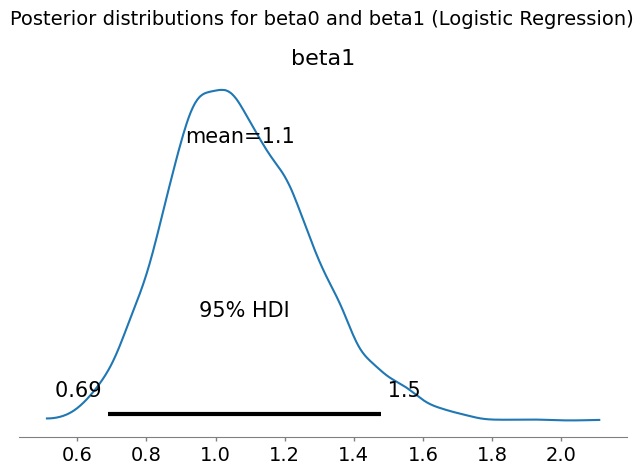

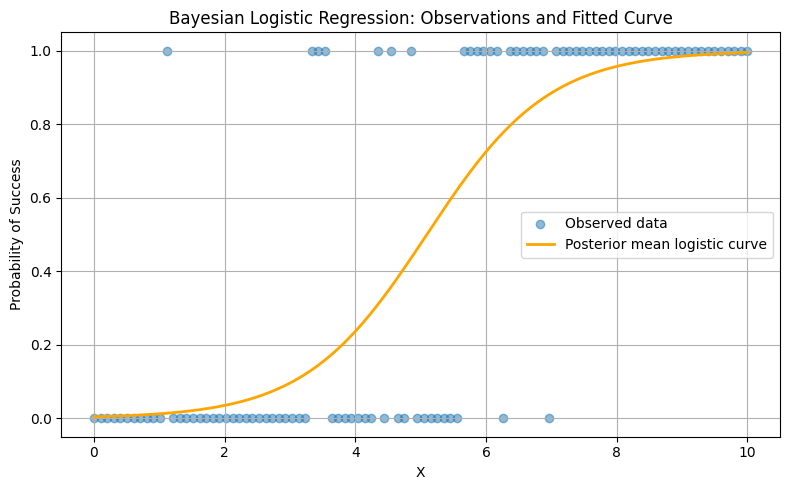

In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data for logistic regression
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_beta0 = -4.0
true_beta1 = 0.8
logits = true_beta0 + true_beta1 * x
p = 1 / (1 + np.exp(-logits))
y = np.random.binomial(1, p)

# Bayesian logistic regression model
with pm.Model() as logistic_model:
    # Priors for coefficients
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)

    # Logistic transformation
    logit_p = beta0 + beta1 * x
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)

    # Sampling
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Plot posterior distributions
az.plot_posterior(trace, var_names=["beta0"], hdi_prob=0.95)
plt.suptitle("Posterior distributions for beta0 and beta1 (Logistic Regression)", fontsize=14)
plt.tight_layout()
plt.show()

az.plot_posterior(trace, var_names=["beta1"], hdi_prob=0.95)
plt.suptitle("Posterior distributions for beta0 and beta1 (Logistic Regression)", fontsize=14)
plt.tight_layout()
plt.show()

# Extract posterior means
beta0_mean = trace.posterior["beta0"].mean().values
beta1_mean = trace.posterior["beta1"].mean().values
# Plot data and logistic curve
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Observed data", alpha=0.5)
x_plot = np.linspace(0, 10, 200)
p_pred = 1 / (1 + np.exp(-(beta0_mean + beta1_mean * x_plot)))
plt.plot(x_plot, p_pred, color="orange", linewidth=2, label="Posterior mean logistic curve")
plt.xlabel("X")
plt.ylabel("Probability of Success")
plt.title("Bayesian Logistic Regression: Observations and Fitted Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


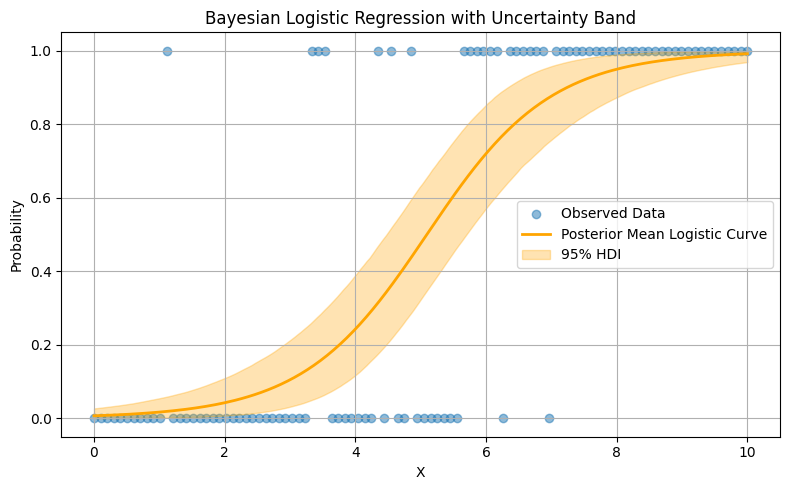

In [17]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n)
true_beta0 = -4.0
true_beta1 = 0.8
logits = true_beta0 + true_beta1 * x
p = 1 / (1 + np.exp(-logits))
y = np.random.binomial(1, p)

# Bayesian logistic regression model
with pm.Model() as logistic_model:
    beta0 = pm.Normal("beta0", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)
    
    logit_p = beta0 + beta1 * x
    p = pm.Deterministic("p", pm.math.sigmoid(logit_p))
    
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y)
    
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Extract posterior samples for prediction
x_pred = np.linspace(0, 10, 200)
beta0_samples = trace.posterior["beta0"].stack(samples=("chain", "draw")).values
beta1_samples = trace.posterior["beta1"].stack(samples=("chain", "draw")).values

# Generate predicted probabilities for each sample
probs = []
for b0, b1 in zip(beta0_samples, beta1_samples):
    prob = 1 / (1 + np.exp(-(b0 + b1 * x_pred)))
    probs.append(prob)
probs = np.array(probs)

# Compute 95% HDI interval
lower = np.percentile(probs, 2.5, axis=0)
upper = np.percentile(probs, 97.5, axis=0)
mean_pred = np.mean(probs, axis=0)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, label="Observed Data")
plt.plot(x_pred, mean_pred, color="orange", label="Posterior Mean Logistic Curve", linewidth=2)
plt.fill_between(x_pred, lower, upper, color="orange", alpha=0.3, label="95% HDI")
plt.xlabel("X")
plt.ylabel("Probability")
plt.title("Bayesian Logistic Regression with Uncertainty Band")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


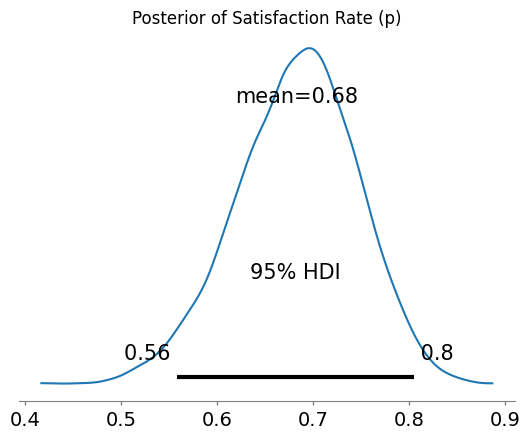

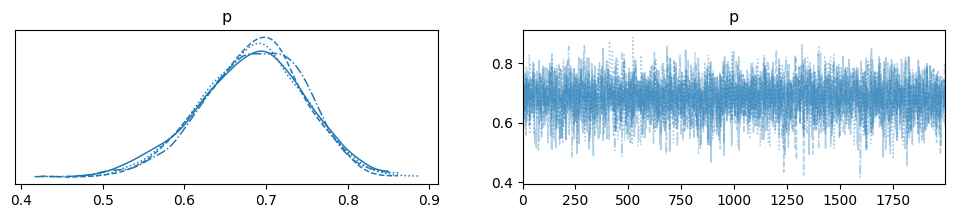

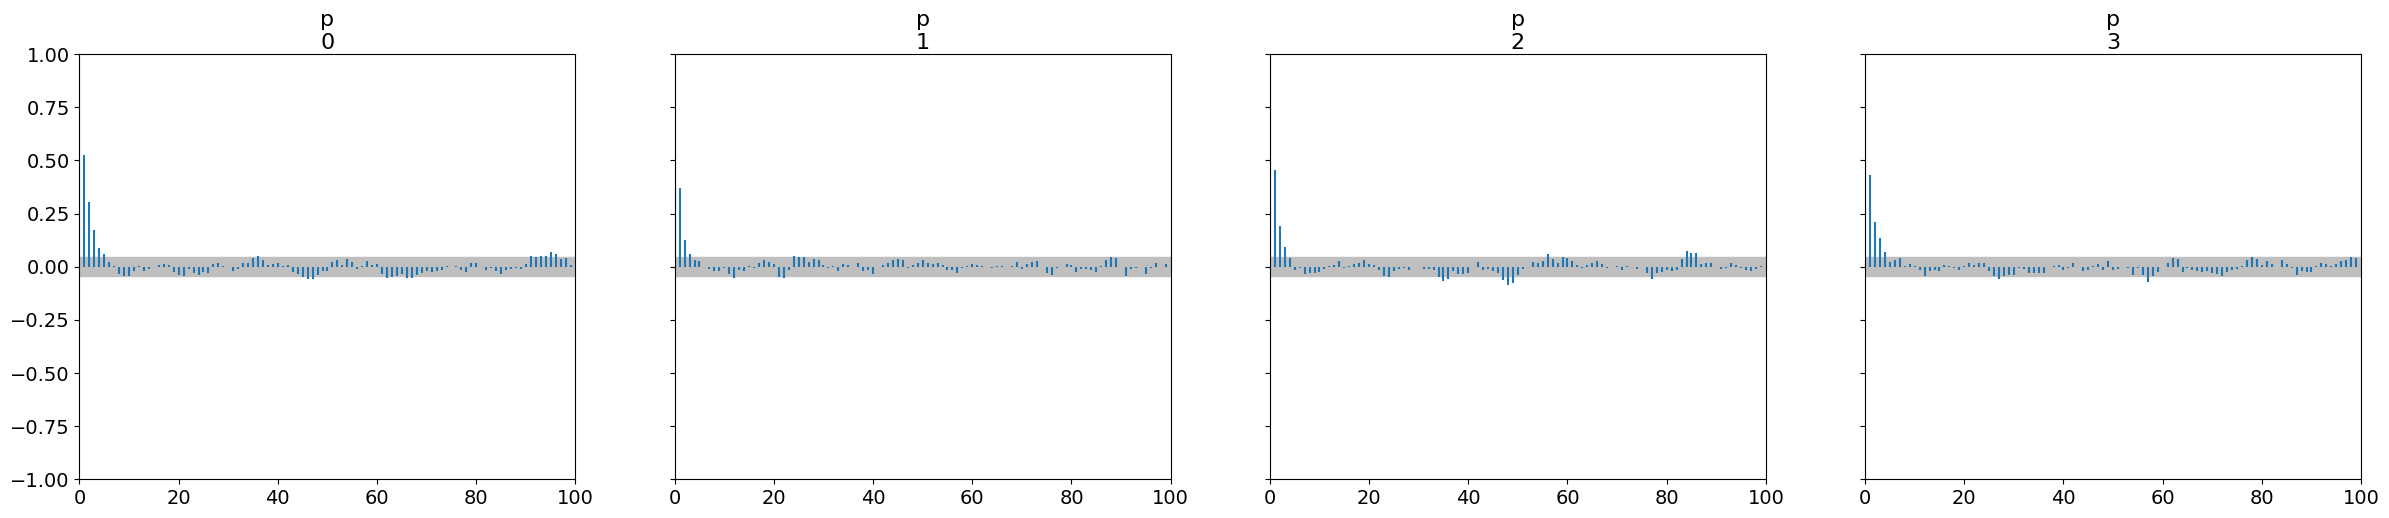

R-hat:
<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    p        float64 8B 1.001
Effective Sample Size:
<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    p        float64 8B 2.946e+03
Summary:
    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.683  0.063   0.562      0.8      0.001    0.001    2946.0    2856.0   

   r_hat  
p    1.0  


In [1]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Data
satisfied = 35
n_tourists = 50

# Model
with pm.Model() as model_binomial:
    p = pm.Beta("p", alpha=2, beta=2)
    obs = pm.Binomial("obs", n=n_tourists, p=p, observed=satisfied)
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95, random_seed=42)

# Posterior
az.plot_posterior(trace, var_names=["p"], hdi_prob=0.95)
plt.title("Posterior of Satisfaction Rate (p)")
plt.show()

# Traceplot
az.plot_trace(trace, var_names=["p"])
plt.show()

# Autocorrelation
az.plot_autocorr(trace, var_names=["p"])
plt.show()

# Convergence diagnostics
print("R-hat:")
print(az.rhat(trace, var_names=["p"]))

print("Effective Sample Size:")
print(az.ess(trace, var_names=["p"]))

print("Summary:")
print(az.summary(trace, var_names=["p"]))


In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

# Crear directorio para guardar gráficos
output_dir = "tourism_poisson_example"
os.makedirs(output_dir, exist_ok=True)

# Simulamos datos de turistas llegando por día
np.random.seed(42)
true_lambda = 45  # tasa promedio de llegadas por día
observed_data = np.random.poisson(lam=true_lambda, size=30)

# Definimos el modelo Bayesiano
with pm.Model() as poisson_model:
    λ = pm.Gamma("λ", alpha=2, beta=0.1)  # Prior
    y_obs = pm.Poisson("y_obs", mu=λ, observed=observed_data)  # Likelihood
    
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Posterior
az.plot_posterior(trace, var_names=["λ"], hdi_prob=0.95)
plt.title("Posterior of λ (Arrival Rate)")
plt.savefig(f"{output_dir}/posterior_arrival_lambda.png")
plt.close()

# Trazas (Traceplots)
az.plot_trace(trace, var_names=["λ"])
plt.savefig(f"{output_dir}/trace_arrival_lambda.png")
plt.close()

# Autocorrelación
az.plot_autocorr(trace, var_names=["λ"])
plt.savefig(f"{output_dir}/autocorr_arrival_lambda.png")
plt.close()

# Resumen estadístico
summary = az.summary(trace, var_names=["λ"])
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [λ]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
λ  43.514  1.239  41.154   45.747      0.021    0.015    3366.0    5614.0   

   r_hat  
λ    1.0  


In [3]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

# Crear directorio para gráficos
output_dir = "tourism_normal_known_var"
os.makedirs(output_dir, exist_ok=True)

# Simulación de datos
np.random.seed(42)
true_mu = 8.0         # satisfacción media real
sigma = 1.0           # varianza conocida
n_samples = 30
y = np.random.normal(loc=true_mu, scale=sigma, size=n_samples)

# Modelo bayesiano con varianza conocida
with pm.Model() as model:
    mu = pm.Normal("mu", mu=7.0, sigma=2.0)  # prior: media esperada, varianza alta
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=y)  # likelihood

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Posterior de mu
az.plot_posterior(trace, var_names=["mu"], hdi_prob=0.95)
plt.title("Posterior of Tourist Satisfaction (μ)")
plt.savefig(f"{output_dir}/posterior_mu.png")
plt.close()

# Trazas (traceplot)
az.plot_trace(trace, var_names=["mu"])
plt.savefig(f"{output_dir}/trace_mu.png")
plt.close()

# Autocorrelación
az.plot_autocorr(trace, var_names=["mu"])
plt.savefig(f"{output_dir}/autocorr_mu.png")
plt.close()

# Resumen estadístico
summary = az.summary(trace, var_names=["mu"])
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu  7.807  0.185    7.48    8.169      0.003    0.002    3439.0    5539.0   

    r_hat  
mu    1.0  


In [4]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

# Crear carpeta de salida
output_dir = "tourism_normal_unknown_var"
os.makedirs(output_dir, exist_ok=True)

# Simular datos turísticos
np.random.seed(123)
true_mu = 7.5       # satisfacción real
true_sigma = 1.2    # desviación estándar real
n = 40
y = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

# Modelo con media y varianza desconocidas
with pm.Model() as model:
    # Prior para la varianza: Inverse-Gamma ~ 1/sigma²
    sigma2 = pm.InverseGamma("sigma2", alpha=2.0, beta=2.0)

    # Prior para la media, condicional en sigma²
    mu = pm.Normal("mu", mu=7.0, sigma=pm.math.sqrt(sigma2 / 5.0))  # kappa0 = 5

    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=pm.math.sqrt(sigma2), observed=y)

    # Sampling
    trace = pm.sample(3000, tune=1000, return_inferencedata=True, target_accept=0.9)

# --- Diagnóstico y visualización ---

# Posteriores
az.plot_posterior(trace, var_names=["mu", "sigma2"], hdi_prob=0.95)
plt.savefig(f"{output_dir}/posterior_mu_sigma2.png")
plt.close()

# Trazas
az.plot_trace(trace, var_names=["mu", "sigma2"])
plt.savefig(f"{output_dir}/trace_mu_sigma2.png")
plt.close()

# Autocorrelaciones
az.plot_autocorr(trace, var_names=["mu", "sigma2"])
plt.savefig(f"{output_dir}/autocorr_mu_sigma2.png")
plt.close()

# Resumen
summary = az.summary(trace, var_names=["mu", "sigma2"])
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma2, mu]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu      7.354  0.208   6.976    7.763      0.002    0.001   10157.0    7387.0   
sigma2  1.981  0.442   1.235    2.812      0.004    0.003   10705.0    7762.0   

        r_hat  
mu        1.0  
sigma2    1.0  


In [6]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import os

# Create output directory for plots
output_dir = "tourism_normal_known_var_"
os.makedirs(output_dir, exist_ok=True)

# -------------------------------
# Step 1: Simulate synthetic tourism data
# -------------------------------
np.random.seed(42)
true_mu = 4.5             # True average duration of the tour in hours
known_sigma = 1.0         # Known standard deviation (e.g., from historical records)
n = 50                    # Number of observed tours
tour_duration_data = np.random.normal(loc=true_mu, scale=known_sigma, size=n)

# -------------------------------
# Step 2: Define Bayesian model
# -------------------------------
with pm.Model() as model:
    # Prior distribution for the unknown mean μ
    mu = pm.Normal("mu", mu=0, sigma=10)

    # Likelihood (data) with known standard deviation
    y_obs = pm.Normal("y_obs", mu=mu, sigma=known_sigma, observed=tour_duration_data)

    # Draw posterior samples using MCMC
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# -------------------------------
# Step 3: Posterior analysis
# -------------------------------

# Plot the posterior distribution of mu
az.plot_posterior(trace, var_names=["mu"], hdi_prob=0.95)
plt.title("Posterior of Tour Duration Mean (μ)")
plt.savefig(f"{output_dir}/posterior_mu.png")
plt.close()

# Trace plot to assess convergence
az.plot_trace(trace, var_names=["mu"])
plt.savefig(f"{output_dir}/trace_mu.png")
plt.close()

# Autocorrelation plot for diagnostics
az.plot_autocorr(trace, var_names=["mu"])
plt.savefig(f"{output_dir}/autocorr_mu.png")
plt.close()

# Posterior summary statistics (mean, std, HDI, ESS, R-hat)
print(az.summary(trace, var_names=["mu"]))


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu  4.276  0.142   4.005    4.541      0.002    0.002    3290.0    5753.0   

    r_hat  
mu    1.0  
